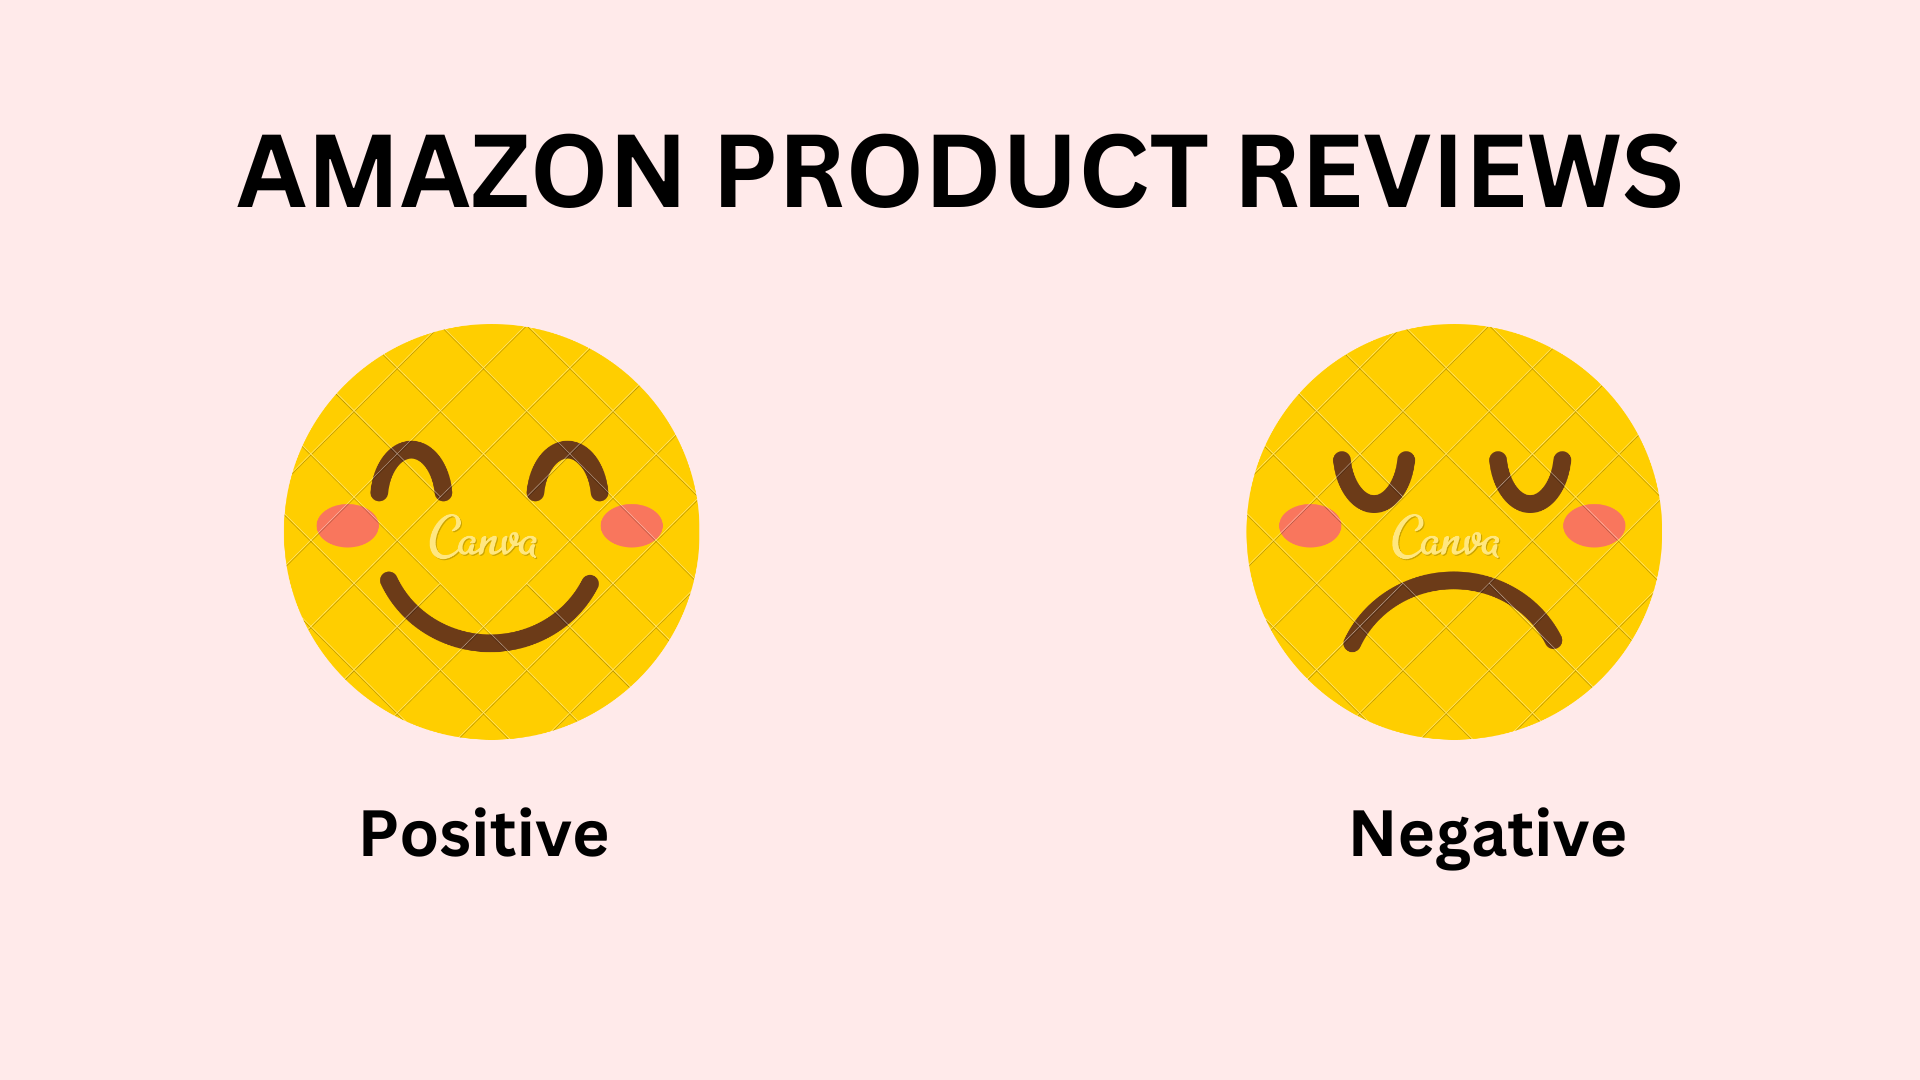

# **AMAZON PRODUCT REVIEWS: SENTIMENT ANALYSIS**

This notebook contains code that analyzes the Amazon product review dataset. I will be performing EDA, Data Preprocessing before building a sentiment analysis model.

## **Downloading and Importing the Necessary Libraries**

In [3]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 11.7 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 16.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import warnings
import nltk
import re
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, roc_curve, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
import joblib

warnings.filterwarnings("ignore")

/tmp/ipykernel_1225/2618731625.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **Exploratory Data Analysis**

In [4]:
df = pd.read_csv("/workspaces/FLiT-Apprenticeship-Data-Science-Projects/Project_3 Sentiment-Analysis-for-Product-Reviews/Amazon-Product-Reviews - Amazon Product Review (1).csv")

In [5]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,11555559,R1QXC7AHHJBQ3O,B00IKPX4GY,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,Great love it,2015-08-31,1
1,US,31469372,R175VSRV6ZETOP,B00IKPYKWG,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,3,0,0,N,N,Lots of ads Slow processing speed Occasionally...,Lots of ads<br />Slow processing speed<br />Oc...,2015-08-31,0
2,US,26843895,R2HRFF78MWGY19,B00IKPW0UA,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Well thought out device,Excellent unit. The versatility of this table...,2015-08-31,1
3,US,19844868,R8Q39WPKYVSTX,B00LCHSHMS,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,4,0,0,N,N,Not all apps/games we were looking forward to ...,I bought this on Amazon Prime so I ended up bu...,2015-08-31,1
4,US,1189852,R3RL4C8YP2ZCJL,B00IKPZ5V6,2693241,"Fire HD 7, 7"" HD Display, Wi-Fi, 8 GB",PC,5,0,0,N,Y,Five Stars,All Amazon products continue to meet my expect...,2015-08-31,1


In [6]:
#getting the shape
df.shape

(30846, 16)

In [7]:
df.info()  #getting the info summary of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30846 entries, 0 to 30845
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        30846 non-null  object
 1   customer_id        30846 non-null  int64 
 2   review_id          30846 non-null  object
 3   product_id         30846 non-null  object
 4   product_parent     30846 non-null  int64 
 5   product_title      30846 non-null  object
 6   product_category   30846 non-null  object
 7   star_rating        30846 non-null  int64 
 8   helpful_votes      30846 non-null  int64 
 9   total_votes        30846 non-null  int64 
 10  vine               30846 non-null  object
 11  verified_purchase  30846 non-null  object
 12  review_headline    30844 non-null  object
 13  review_body        30842 non-null  object
 14  review_date        30846 non-null  object
 15  sentiment          30846 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 3.

From the above we can see that our review_date isn't in the right data type so we will change that.

In [8]:
#changing the data type of our review date to the right dtype
df["review_date"] = pd.to_datetime(df.review_date)
df.review_date.dtype

dtype('<M8[ns]')

Now that has been changed let's move forward with our analysis.

In [9]:
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      2
review_body          4
review_date          0
sentiment            0
dtype: int64

In [10]:
# checking to see if we have any duplicates
df.duplicated().sum()

0

In [11]:
#from using our `isnull()` method, we found out that two of our columns have missing values
#dropping null
df.dropna(inplace = True)
#checking to see if the above line of code has been carried out
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
sentiment            0
dtype: int64

In [12]:
#checking the number of unique values we have in our dataset
for column in df.columns:
  print(column, ":", df[column].nunique())

marketplace : 1
customer_id : 30839
review_id : 30840
product_id : 21
product_parent : 1
product_title : 1
product_category : 1
star_rating : 5
helpful_votes : 71
total_votes : 80
vine : 1
verified_purchase : 2
review_headline : 15715
review_body : 27759
review_date : 333
sentiment : 2


From the above we can conclude that we are dealing with only one country, one product(parent,title and category) and also one vine. This information will help in the data visualization section.

In [13]:
df.describe() #to get a statistic summary of our dataset

,customer_id,product_parent,star_rating,helpful_votes,total_votes,review_date,sentiment
count,3.084000e+04,30840.0,30840.000000,30840.000000,30840.000000,30840,30840.000000
mean,2.470843e+07,2693241.0,4.336316,0.686543,0.894942,2015-03-11 10:55:22.645914624,0.835376
min,1.134600e+04,2693241.0,1.000000,0.000000,0.000000,2014-10-03 00:00:00,0.000000
25%,1.150586e+07,2693241.0,4.000000,0.000000,0.000000,2015-01-04 00:00:00,1.000000
50%,2.294012e+07,2693241.0,5.000000,0.000000,0.000000,2015-02-16 00:00:00,1.000000
75%,4.008417e+07,2693241.0,5.000000,0.000000,0.000000,2015-05-17 00:00:00,1.000000
max,5.309351e+07,2693241.0,5.000000,3720.000000,3875.000000,2015-08-31 00:00:00,1.000000
std,1.611152e+07,0.0,1.120569,30.746359,32.359474,NaN,0.370847


Before we move on to finding trends and patterns in our dataset, I will create some new columns for easy data visualization.

In [14]:
#from our review_date column I will extract new columns that show the year and month each review was made
df["month"] = df["review_date"].dt.month
df["year"] = df["review_date"].dt.year

In [15]:
#checking to see how many years we have in our dataset
df["year"].value_counts()

year
2015    25020
2014     5820
Name: count, dtype: int64

## **Data Visualizations**

Now that we have our columns sorted out, we will move on to the data visualization aspect. For this section, we will be finding trends and patterns in the dataset. The flow of this section will look like this:

`Univariate Visualization --- Bivariate Visualization`

[Learn more about Univariate and Bivariate Analysis]("https://www.geeksforgeeks.org/what-is-univariate-bivariate-multivariate-analysis-in-data-visualisation/")


### **Univariate Analysis**

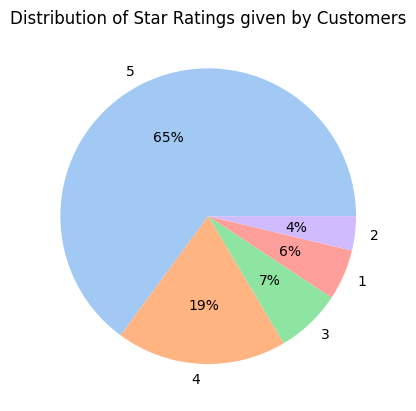

In [16]:
#visualizing the disribution of star ratings given by customers
rating = dict(df["star_rating"].value_counts())
palette = sns.color_palette("pastel")
plt.pie(rating.values(), labels = rating.keys(), autopct = "%.0f%%", colors = palette)
plt.title("Distribution of Star Ratings given by Customers")
plt.show()

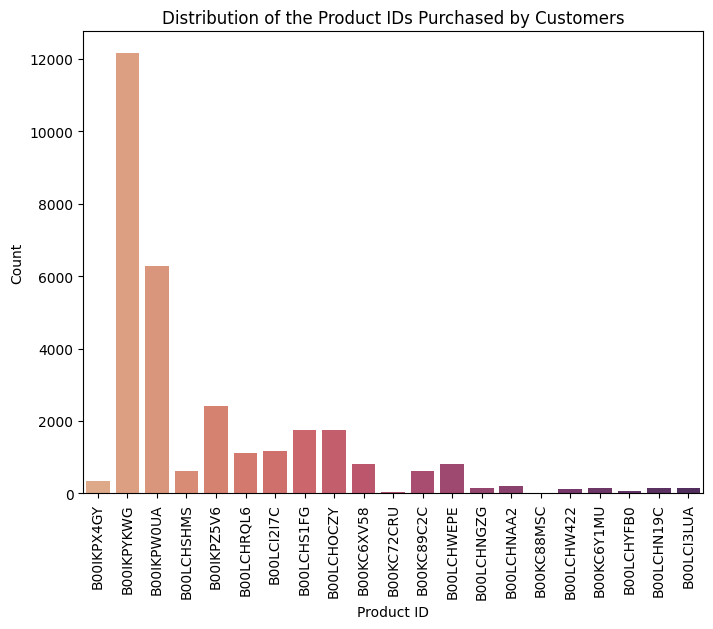

In [17]:
#visualizing the distribution of the products by their IDs bought by the customers
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "product_id", palette = "flare")
plt.title("Distribution of the Product IDs Purchased by Customers")
plt.xticks(rotation = 90)
plt.xlabel("Product ID")
plt.ylabel("Count");

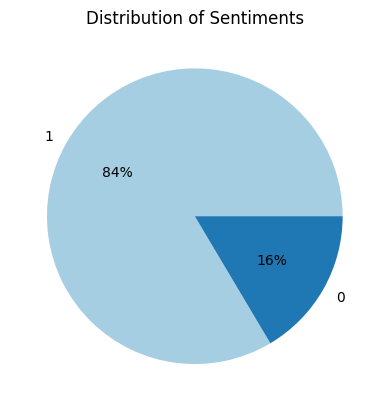

In [18]:
#creating a distribution of the percentage of sentiments
sent = dict(df["sentiment"].value_counts())
palette = sns.color_palette("Paired")
plt.pie(sent.values(), labels = sent.keys(), autopct = "%.0f%%",colors = palette)
plt.title("Distribution of Sentiments")
plt.show()

### **Bivariate Analysis**

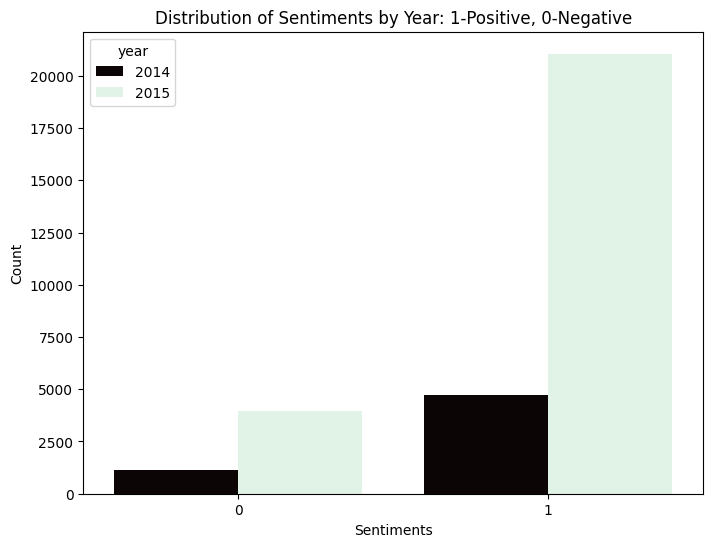

In [19]:
#creating a visualization to show the relationship between the sentiments and the years available
plt.figure(figsize = (8,6))
sns.countplot(df, x = "sentiment", hue = "year", palette = "mako")
plt.xlabel("Sentiments")
plt.ylabel("Count")
plt.title("Distribution of Sentiments by Year: 1-Positive, 0-Negative");

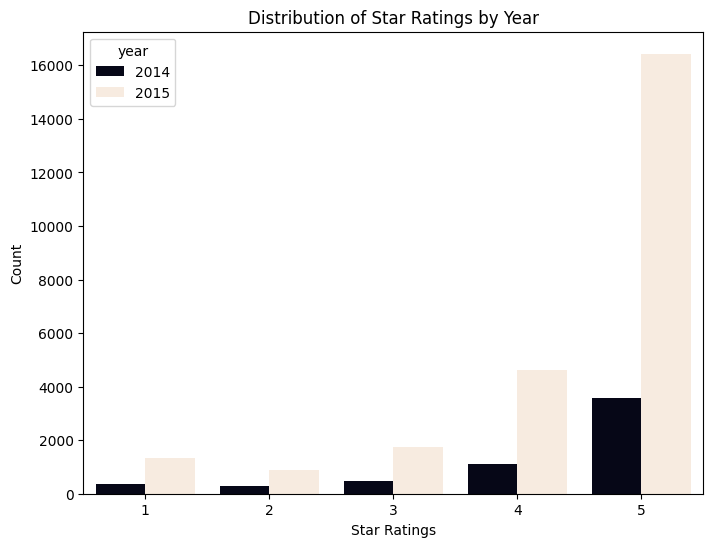

In [20]:
#moving on to bivariate analysis. we will see the relation between the star ratings and the year
plt.figure(figsize = (8,6))
sns.countplot(df, x = "star_rating", hue  = "year", palette = "rocket")
plt.xlabel("Star Ratings")
plt.ylabel("Count")
plt.title("Distribution of Star Ratings by Year");

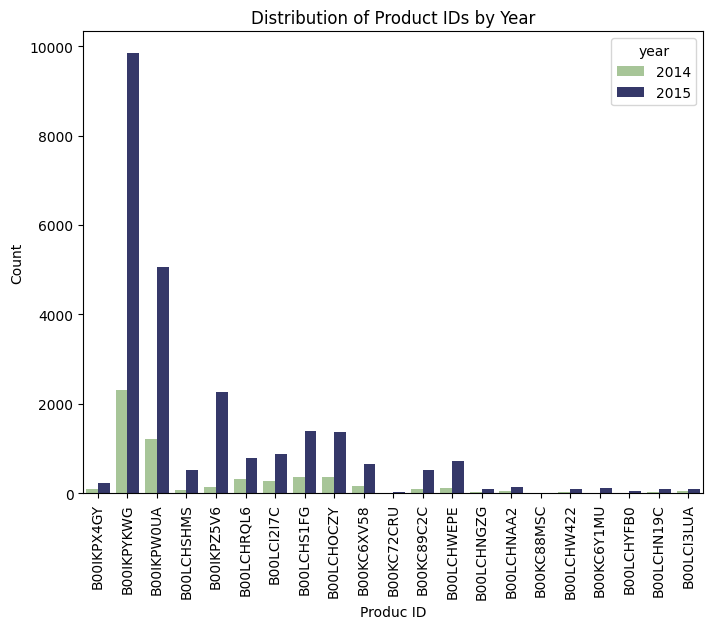

In [21]:
#creating a visual between the product IDs and years
plt.figure(figsize = (8,6))
sns.countplot(df, x = "product_id", hue = "year",palette = "crest")
plt.xlabel("Produc ID")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Distribution of Product IDs by Year");

### **Interpretation of Data Visualization Results**

From the above univariate and bivariate analysis, the following can be found in the visualizations:
1. Amazon products on a scale of 1-5, with one being bad and 5 being excellent, have a 65% of excellent ratings.
2. The 5 star rating for products increased massively in the year 2015.
3. Positive sentiments also garnered much percentage than that of the negative sentiments-84% for positive and 16% for negative. There is also a massive increase in positive sentiments in the year 2015.
4. In all 2015, showed that customers were pleased with their purchases. 

## **Data Preprocessing**

In this stage, we will be performing data preprocessing before converting our date into vectors and passing it into our chosen machine learning model. In order of occurence:
1. we will be getting rid of characters that are not alphabets using a regular expression
2. In addition to all that, we will be converting the records to lowercase so as to avoid problems when we get to the vectorization stage.
3. Next, we will also be removing stopwords as they do not necessarily add any meaning.
4. We will then perform lemmatization and return a corpus of processed data. [Learn more](https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/)

In [22]:
# creating an object of WordNetLemmatizer
wn = WordNetLemmatizer()

In [23]:
#creating a function to perform our preprocessing of data
def data_transform(data):
    corpus = [] #this will hold our new preprocessed data
    for item in data: #iterating through our data
        new_item = re.sub('[^a-zA-Z]',' ',str(item)) #this will select characters that are not alphabets and replace them with a space and convert to a string
        new_item = new_item.lower() #changing data to lower case
        new_item = new_item.split() #performing tokenization by splitting the string into a list of word
        new_item = [wn.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))] #returns the lemma of each word in the list and removes stopwords in the process
        corpus.append(' '.join(str(x) for x in new_item)) #joining our processed data into a sentence and appending it to our empty list 
    return corpus

In [24]:
corpus = data_transform(df['review_body'])

The Word Cloud section below helps us to see how our data looks after preprocessng and we get to see the most common words for positive and negative reviews each

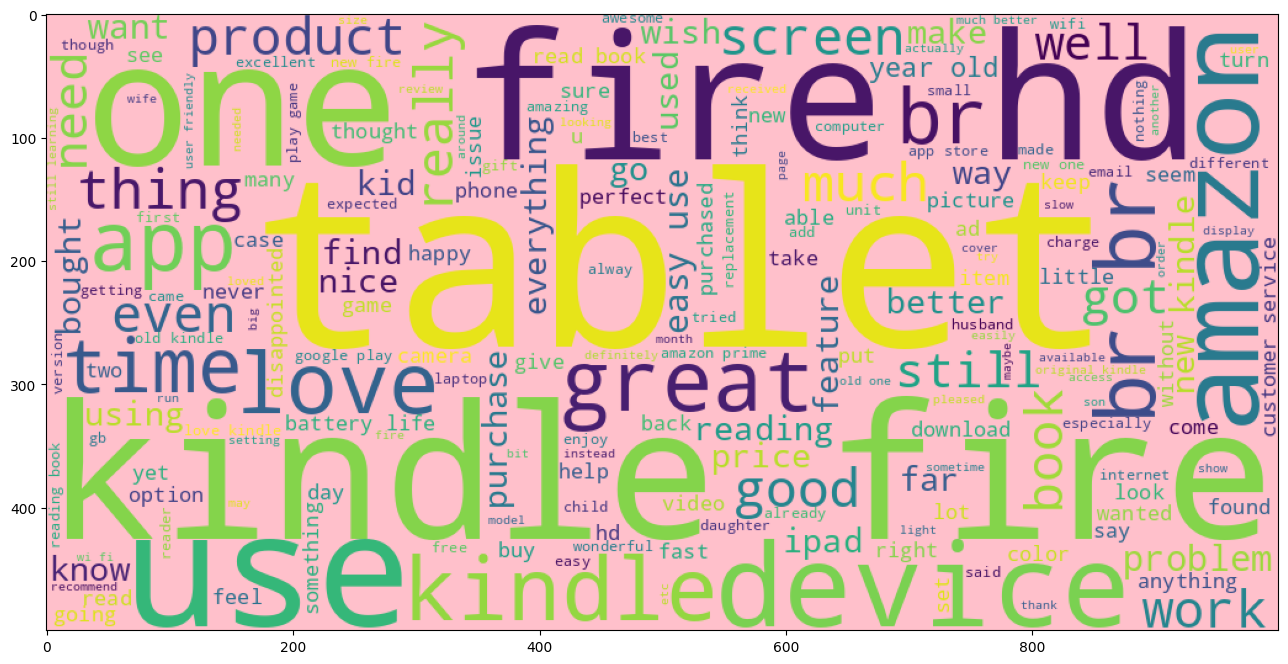

In [25]:
# since we now have a clean and preprocessed data, we will create a word cloud to see how the data looks
rcParams["figure.figsize"] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+= " ".join(word)
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'pink', min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)

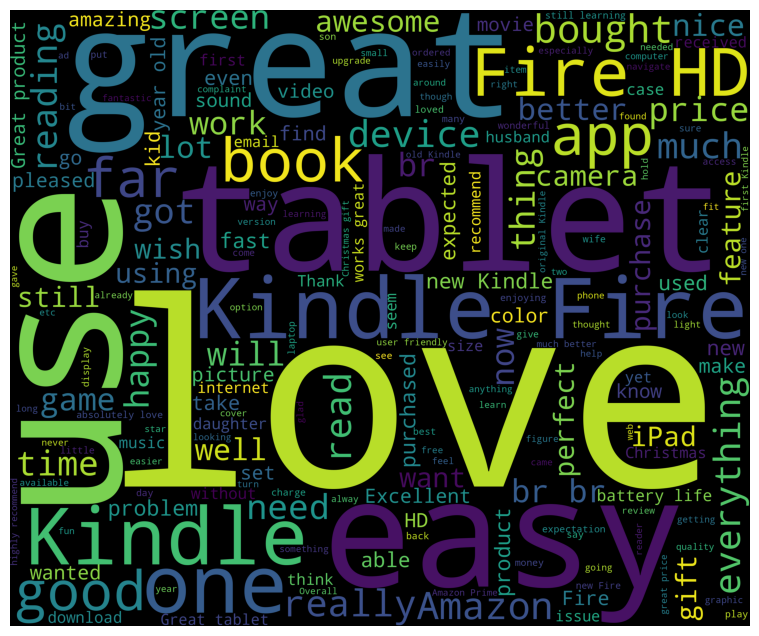

In [26]:
#WordCloud - Sentiment Positive

df1 = df[df['sentiment']== 1]
words = ' '.join(df1['review_body'].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='black',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

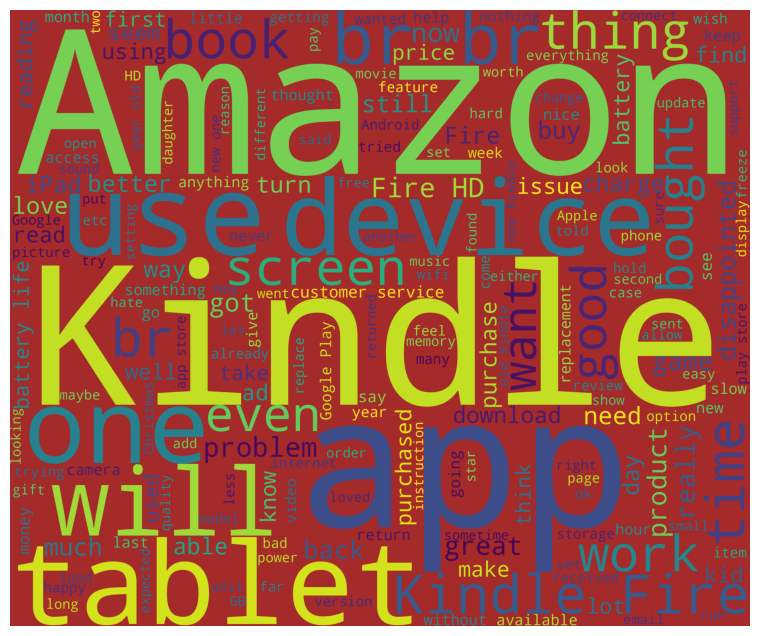

In [27]:
df2 = df[df["sentiment"] == 0]
words = ' '.join(df2["review_body"].astype(str))
cleaned_word = ' '.join([word for word in words.split() if not word.startswith('@')])

wordcloud = WordCloud(background_color='brown',stopwords=STOPWORDS,
                      width=3000, height=2500).generate(''.join(cleaned_word))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## **Data Splitting and Machine Learning Model Building**

Since we have a preprocessed data, we will be splitting our data into test and train data then perform vectorization.

In [28]:
X_test,X_train, y_test,y_train = train_test_split(corpus, df.sentiment, test_size = 0.2)

In [29]:
# creating an instance of our count vectorizer which will be used to convert our text data into vectors  
cv = CountVectorizer(ngram_range = (1,2))

### Model Building and Evaluation without using GridSearchCV

In [30]:
#fit and transform the training data
X_train_df = cv.fit_transform(X_train)

In [31]:
#instantiate model
rfc = RandomForestClassifier()
#fit the data
rfc.fit(X_train_df, y_train)

RandomForestClassifier()

In [32]:
#transform our test data
X_test_df = cv.transform(X_test)

#make predictions
predict = rfc.predict(X_test_df)

In [33]:
#Model Evaluation without the use of gridsearchcv
accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test,predict)
print("*"*50)
print('Accuracy Score: ', accuracy)
print('Precison Score: ', precision)
print('Recall Score: ', recall)
print("*"*50)
report = classification_report(y_test,predict)
print(report)

**************************************************
Accuracy Score:  0.8619082360570688
Precison Score:  0.864789091372499
Recall Score:  0.9891167039160431
**************************************************
              precision    recall  f1-score   support

           0       0.80      0.22      0.35      4090
           1       0.86      0.99      0.92     20582

    accuracy                           0.86     24672
   macro avg       0.83      0.61      0.64     24672
weighted avg       0.85      0.86      0.83     24672



### Model Building and Evaluation using Grid Search CV

In [37]:
# we will be implementing our grid search cv to find the best parameters for our model
# creating a dictionary of hyperparameters
parameters = {'max_features': ('auto','sqrt'),
             'n_estimators': [500, 1000, 1500],
             'max_depth': [5, 10, None],
             'min_samples_split': [5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10],
             'bootstrap': [True, False]}

In [ ]:
#fitting into the grid search
grid_search = GridSearchCV(RandomForestClassifier(), parameters, cv = 5, return_train_score = True, n_jobs = -1)
grid_search.fit(X_train_df, y_train)
grid_search.best_params_

In [ ]:
#we will iterate through the results, to get a look at the parameters
for i in range(432):
    print('Parameters: ',grid_search.cv_results_['params'][i])
    print('Mean Test Score: ',grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ',grid_search.cv_results_['rank_test_score'][i])

In [ ]:
#now we will use the best parameters gotten from our grid search cv, create our final model and then train it
rfc_1 = RandomForestClassifier(max_features=grid_search.best_params_['max_features'],
                                      max_depth=grid_search.best_params_['max_depth'],
                                      n_estimators=grid_search.best_params_['n_estimators'],
                                      min_samples_split=grid_search.best_params_['min_samples_split'],
                                      min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
                                      bootstrap=grid_search.best_params_['bootstrap'])
rfc_1.fit(X_train_df,y_train)

In [ ]:
#now lets use our model to make predictions on our test data
#converting into vectors
X_test_df1 = cv.transform(X_test)

#predicting our target
prediction = rfc_1.predict(X_test_df1)

In [ ]:
#model evaluation
accuracy_1 = accuracy_score(y_test, prediction)
precision_1 = precison_score(y_test, prediction)
recall_1 = recall_score(y_test,prediction)
print("*"*50)
print('Accuracy Score: ', accuracy_1)
print('Precison Score: ', precision_1)
print('Recall Score: ', recall_1)
print("*"*50)
report_1 = classification_report(y_test,prediction)
print(report_1)

### **DEPLOYMENT: Saving our Model for Streamlit Deployment**

In [34]:
#saving our model to a file
joblib.dump(rfc, "Sentiment_Analysis_Model.joblib")

['Sentiment_Analysis_Model.joblib']